In [89]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import lxml
import numpy as np

## 0. Cargar los datos de estatura y peso

In [90]:
url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'

tables = pd.read_html(url)
height_weight_df = tables[0].iloc[1:, 1:]  
height_weight_df.columns = tables[0].iloc[0, 1:] 

height_weight_df['Height(Inches)'] = pd.to_numeric(height_weight_df['Height(Inches)'])
height_weight_df['Weight(Pounds)'] = pd.to_numeric(height_weight_df['Weight(Pounds)'])

## 1. Count records in the dataframe

In [91]:
num_records = len(height_weight_df)
print(f"Number of records: {num_records}")

Number of records: 25000


## 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

In [92]:
X = height_weight_df[['Height(Inches)']].values.reshape(-1, 1)  
y = height_weight_df['Weight(Pounds)'].values 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Original Output Values (Weight in Pounds):")
print(y)

print("\nPredicted Output Values (Weight in Pounds):")
print(y_pred)

Original Output Values (Weight in Pounds):
[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]

Predicted Output Values (Weight in Pounds):
[120.26554382 137.93972246 131.41363707 ... 116.92071191 125.64889284
 129.80674499]


## 3. Hallar el intercepto

In [93]:
intercept = model.intercept_
print(f"Intercept (b): {intercept}")

Intercept (b): -82.57574306454093


## 4. Hacer la grafica

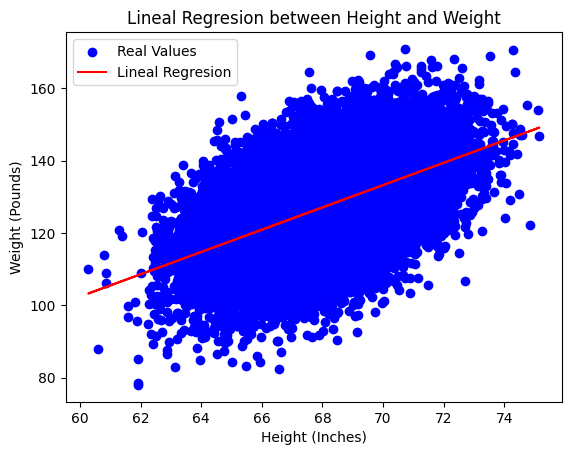

In [96]:
plt.scatter(X, y, color='blue', label='Real Values')
plt.plot(X, y_pred, color='red', label='Lineal Regresion')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Lineal Regresion between Height and Weight')
plt.legend()
plt.show()

## 5. Hallar correlacion y valor p

In [95]:
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
print(f"Correlation: {correlation}")
print(f"P-Value: {p_value}")

Correlation: 0.5028585206028445
P-Value: 0.0


## 6. Interpretar el valor p

Ya que el valor p obtenido es 0.0, signifca que hay una correlacion entre Height y Weight. Por lo que la relacion es real y no una coincidencia. Por lo que dice que mientras mas alto es el Height, mas alto es el Weight.